<a href="https://colab.research.google.com/github/tysonjohn015/Azure_LanguageDetection/blob/main/Project2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
df_original = pd.read_csv("p2-arbres-fr.csv", sep=";")

# Data Analysis

We use different functions of Pandas to quickly analyse the data from the CSV file.

In [ ]:
df_original.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [ ]:
df_original.tail()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [ ]:
# find all the null values in the CSV
df_original.isnull().sum().sort_values(ascending=False)

numero                 200137
complement_addresse    169235
variete                163360
stade_developpement     67205
remarquable             63098
espece                   1752
libelle_francais         1497
genre                      16
domanialite                 1
type_emplacement            0
arrondissement              0
geo_point_2d_b              0
lieu                        0
id_emplacement              0
geo_point_2d_a              0
circonference_cm            0
hauteur_m                   0
id                          0
dtype: int64

We copying the required columns to a nez dataframe which will be used for our further analysis


*   For Geo Location : arrondissement, geo_point_2d_a & geo_point_2d_b
*   For level of care: stade_developpement
*   For Euipments decision: circonference_cm & hauteur_m





In [ ]:
df=df_original.iloc[:,[0, 3, 12, 13, 14, 16, 17]].copy()

df.rename(columns={
    "hauteur_m":"hauteur (m)",
    "stade_developpement":"stade",
    "circonference_cm":"circonference (cm)",
    "geo_point_2d_a":"geoLoc a",
    "geo_point_2d_b":"geoLoc b"
},inplace=True)

df.head()

,id,arrondissement,circonference (cm),hauteur (m),stade,geoLoc a,geoLoc b
0,99874,PARIS 7E ARRDT,20,5,NaN,48.857620,2.320962
1,99875,PARIS 7E ARRDT,65,8,A,48.857656,2.321031
2,99876,PARIS 7E ARRDT,90,10,A,48.857705,2.321061
3,99877,PARIS 7E ARRDT,60,8,A,48.857722,2.321006
4,99878,PARIS 17E ARRDT,38,0,NaN,48.890435,2.315289


In [ ]:
df.describe(include="all") 

,id,arrondissement,circonference (cm),hauteur (m),stade,geoLoc a,geoLoc b
count,2.001370e+05,200137,200137.000000,200137.000000,132932,200137.000000,200137.000000
unique,NaN,25,NaN,NaN,4,NaN,NaN
top,NaN,PARIS 15E ARRDT,NaN,NaN,A,NaN,NaN
freq,NaN,17151,NaN,NaN,64438,NaN,NaN
mean,3.872027e+05,NaN,83.380479,13.110509,NaN,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,NaN,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,NaN,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,NaN,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,NaN,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,NaN,48.876447,2.386838


In [ ]:
df.isnull().sum().sort_values(ascending=False)

stade                 67205
geoLoc b                  0
geoLoc a                  0
hauteur (m)               0
circonference (cm)        0
arrondissement            0
id                        0
dtype: int64

# Data Cleaning

Data to the tallest and largest trees: https://en.wikipedia.org/wiki/List_of_superlative_trees

Tree height measurement methods are often unreliable, sometimes producing exaggerations of 5% to 15%, So we add 15% to the tallest recorded tree which is at 115.92.

---


*   Hauteur limit is ketp at **133** meters after taking exaggerations into account
*   Circonference limit is kept at **4000** centimeters as the largest tree is 37.7 meters in Circonference
*   We considering 0 as a true value for all the plants who fall in the category from 0 to 0.5


In [ ]:
# Circonference limit is kept at 4000 centimeters as the largest tree is 37.7 meters in Circonference
circonferenceLimit = (df['circonference (cm)'] >= 0) & (df['circonference (cm)'] <= 4000) #df['circonference (cm)'].max()) #
# Hauteur limit is ketp at 133 meters after taking exaggerations into account
hauteurLimit = (df['hauteur (m)'] >= 0) & (df['hauteur (m)'] <= 133) #df['hauteur (m)'].max()) #

In [ ]:
df[circonferenceLimit].describe()

,id,circonference (cm),hauteur (m),geoLoc a,geoLoc b
count,2.001180e+05,200118.000000,200118.000000,200118.000000,200118.000000
mean,3.872150e+05,80.039901,13.106212,48.854490,2.348208
std,5.456276e+05,67.982563,1971.310145,0.030235,0.051221
min,9.987400e+04,0.000000,0.000000,48.742290,2.210241
25%,1.559162e+05,30.000000,5.000000,48.835020,2.307529
50%,2.210735e+05,70.000000,8.000000,48.854162,2.351096
75%,2.740998e+05,115.000000,12.000000,48.876447,2.386838
max,2.024745e+06,3630.000000,881818.000000,48.911485,2.469759


In [ ]:
df[hauteurLimit].describe()

,id,circonference (cm),hauteur (m),geoLoc a,geoLoc b
count,2.000730e+05,200073.000000,200073.000000,200073.000000,200073.000000
mean,3.871581e+05,83.334733,8.476291,48.854491,2.348207
std,5.455652e+05,673.090222,7.059151,0.030237,0.051219
min,9.987400e+04,0.000000,0.000000,48.742290,2.210241
25%,1.558820e+05,30.000000,5.000000,48.835019,2.307529
50%,2.210560e+05,70.000000,8.000000,48.854162,2.351095
75%,2.740790e+05,115.000000,12.000000,48.876451,2.386838
max,2.024745e+06,250255.000000,130.000000,48.911485,2.469759


In [ ]:
df[(circonferenceLimit) & (hauteurLimit)].describe()

,id,circonference (cm),hauteur (m),geoLoc a,geoLoc b
count,2.000550e+05,200055.000000,200055.000000,200055.000000,200055.000000
mean,3.871699e+05,80.030372,8.475584,48.854490,2.348207
std,5.455883e+05,67.980503,7.058346,0.030237,0.051220
min,9.987400e+04,0.000000,0.000000,48.742290,2.210241
25%,1.558775e+05,30.000000,5.000000,48.835019,2.307528
50%,2.210520e+05,70.000000,8.000000,48.854162,2.351095
75%,2.740775e+05,115.000000,12.000000,48.876450,2.386838
max,2.024745e+06,3630.000000,130.000000,48.911485,2.469759


In [ ]:
# boxplt for 2 distribution
def boxplot_subplots(dist1,dist2):

    sns.set_theme(style="whitegrid")
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    titles=['CIRCONFERENCES DES ARBRES DE PARIS', 'HAUTEURS DES ARBRES DE PARIS']
    ylabels=['CIRCONFERENCE (cm)','HAUTEUR (m)']
    y_=[dist1,dist2]
    fig=[0,0]

    for i in range(2):
        sns.boxplot(ax=axs[i],y=y_[i], width=0.3,palette="crest") 
        axs[i].set_title(titles[i],size=17,color="black")
        axs[i].set_ylabel(ylabels[i],size=15,color="black")
        plt.setp(axs[i].get_yticklabels(), fontsize=15)

    plt.tight_layout()
    plt.show()

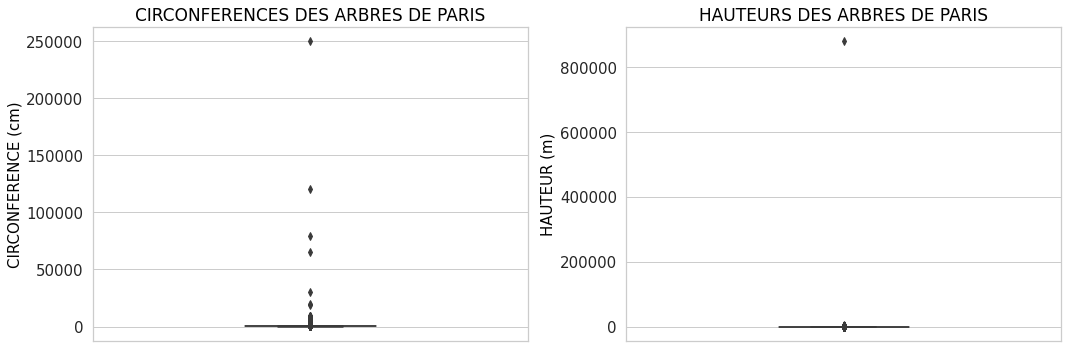

In [ ]:
boxplot_subplots(df['circonference (cm)'], df['hauteur (m)'])

Data after ignoring unrealistic values

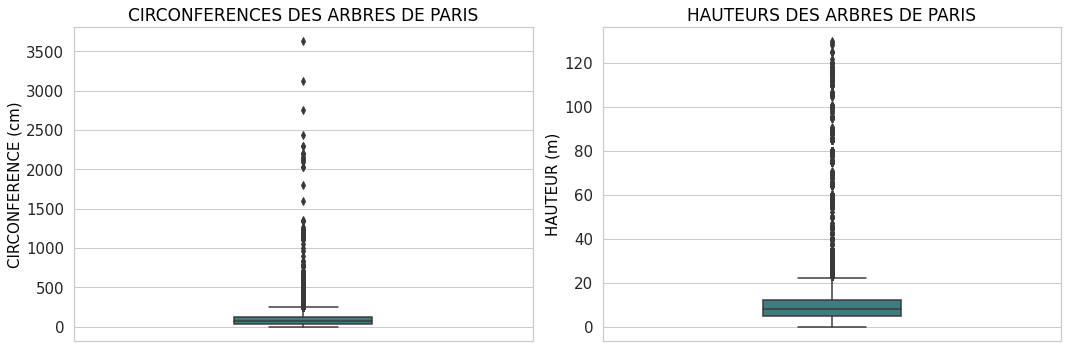

In [ ]:
# Data after ignoring unrealistic values in the column circonference (cm) & hauteur (m)
boxplot_subplots(df[circonferenceLimit & hauteurLimit]['circonference (cm)'], df[circonferenceLimit & hauteurLimit]['hauteur (m)'])

In [ ]:
# assigning the clean data to the dataframe
df = df[circonferenceLimit & hauteurLimit]

# Data manipulation

Replace null values by text "Non spécifié" like already existing in the data in the csv file for the column libelle and genere

In [ ]:
df['stade'] = df['stade'].fillna(value='Non spécifié')
df.isnull().sum().sort_values(ascending=False)

geoLoc b              0
geoLoc a              0
stade                 0
hauteur (m)           0
circonference (cm)    0
arrondissement        0
id                    0
dtype: int64

Z Score method to minimise Outliers

https://towardsdatascience.com/data-handling-using-pandas-cleaning-and-processing-3aa657dc9418

In [ ]:
# from scipy import stats

# # df_num = df.select_dtypes(exclude=['object'])
# df_num = df[['circonference (cm)', 'hauteur (m)']]
# df_num = df_num[(np.abs(stats.zscore(df_num))<3).all(axis=1)]
# df_num.describe

In [ ]:
# boxplot_subplots(df_num['circonference (cm)'], df_num['hauteur (m)'])

In [ ]:
# df = pd.merge(df,df_num)
# df.describe()

# Data Visualization

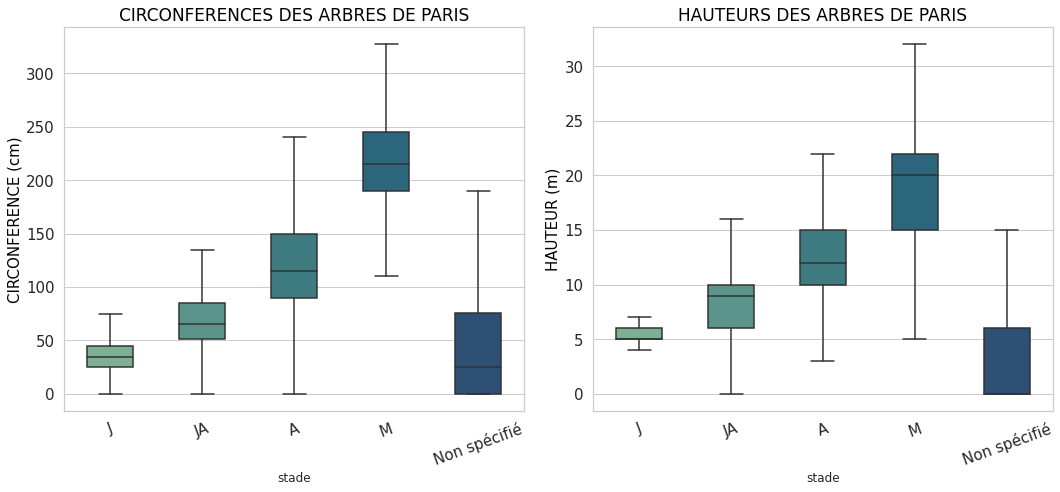

In [ ]:
def boxplot_subplots_multi(dist1, dist2, stade):

    sns.set_theme(style="whitegrid")
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15,7))

    titles=['CIRCONFERENCES DES ARBRES DE PARIS', 'HAUTEURS DES ARBRES DE PARIS']
    ylabels=['CIRCONFERENCE (cm)','HAUTEUR (m)']
    y_=[dist1,dist2]
    x_=stade
    fig=[0,0]

    for i in range(2):
        sns.boxplot(ax=axs[i],x=x_, y=y_[i], width=0.5,showfliers=False, palette="crest", order=["J", "JA", "A", "M", "Non spécifié"]) 
        axs[i].set_title(titles[i],size=17,color="black")
        axs[i].set_ylabel(ylabels[i],size=15,color="black")

        plt.setp(axs[i].get_yticklabels(), fontsize=15)
        plt.setp(axs[i].get_xticklabels(), fontsize=15, rotation=20)
        
    plt.tight_layout()
    plt.show()
    
boxplot_subplots_multi(df['circonference (cm)'], df['hauteur (m)'], df['stade'])

TODO: Depending on the Mean of each Stade the non specific Stade is assigned their stade

In [ ]:
# Analysing the data for young trees
df[df['stade'] == 'J'].describe()

,id,circonference (cm),hauteur (m),geoLoc a,geoLoc b
count,2.692900e+04,26929.000000,26929.000000,26929.000000,26929.000000
mean,5.551592e+05,38.878235,5.782242,48.851983,2.353564
std,6.932683e+05,34.804088,3.631828,0.024666,0.051920
min,9.988400e+04,0.000000,0.000000,48.759069,2.212541
25%,2.067940e+05,25.000000,5.000000,48.833242,2.315492
50%,2.402380e+05,35.000000,5.000000,48.847311,2.349692
75%,2.914250e+05,45.000000,6.000000,48.869577,2.390111
max,2.023252e+06,3630.000000,118.000000,48.910713,2.469759


In [ ]:
qtdArrond = df["arrondissement"].value_counts()
df_arrond = pd.DataFrame(qtdArrond.index, columns = ["ARRONDISSEMENT"])
df_arrond["TOTAL_ARBRES"] = qtdArrond.values
df_arrond .head()

,ARRONDISSEMENT,TOTAL_ARBRES
0,PARIS 15E ARRDT,17149
1,PARIS 13E ARRDT,16711
2,PARIS 16E ARRDT,16398
3,PARIS 20E ARRDT,15338
4,PARIS 19E ARRDT,13702


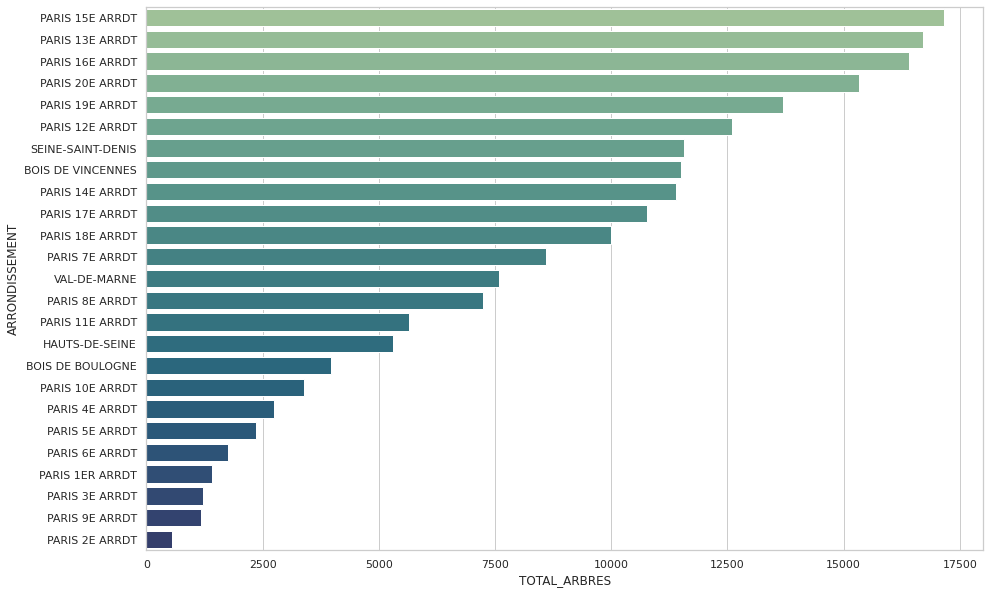

In [ ]:
sns.set_style("whitegrid")
fig, ax=plt.subplots(figsize=(15,10))
sns.barplot(x=df_arrond['TOTAL_ARBRES'],y=df_arrond['ARRONDISSEMENT'], palette="crest")

TODO: use pd.cut to get geo loc mean by district and show map views trees density by district

In [ ]:
# Tableau de contingence entre arrondissement et stade de développement
dfstade_arrond = df[['arrondissement', 'stade']].pivot_table(index='arrondissement', columns='stade',
                aggfunc=len, margins=True, margins_name="Total").sort_values(['J'], ascending=False)

dfstade_arrond = dfstade_arrond.reindex(columns=['J', 'JA', 'A', 'M', 'Non spécifié', 'Total'])
dfstade_arrond.head(10)

stade,J,JA,A,M,Non spécifié,Total
arrondissement,,,,,,
Total,26929,35428,64385,6110,67203,200055
PARIS 14E ARRDT,3780,3203,2778,393,1244,11398
PARIS 13E ARRDT,2949,3452,3359,500,6451,16711
BOIS DE VINCENNES,2860,1658,3381,198,3406,11503
PARIS 20E ARRDT,2221,2989,6931,295,2902,15338
PARIS 15E ARRDT,1726,2839,5064,93,7427,17149
PARIS 19E ARRDT,1682,1913,3225,582,6300,13702
PARIS 18E ARRDT,1668,2122,2584,660,2968,10002
PARIS 12E ARRDT,1612,2913,4097,146,3821,12589


In [ ]:
dfstade_arrond.drop(dfstade_arrond.head(1).index, inplace=True)
dfstade_arrond.drop(["Total"], axis=1,inplace=True)

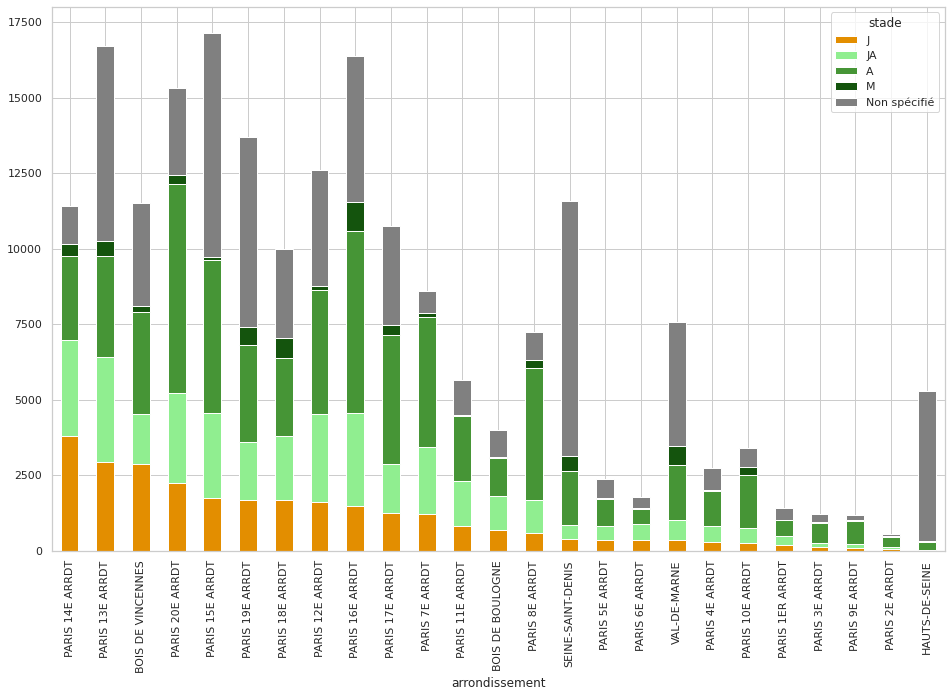

In [ ]:
sns. set_style("whitegrid")
dfstade_arrond.plot(kind="bar", stacked=True, figsize=(16,10), color=["#e38e00","#90EE90", "#469536","#14540d", "#808080"])

In [ ]:
# Analyse the hauter of plants with stade J for Jeunes
dfhauteursJeunes=df[['arrondissement','hauteur (m)']]
dfhauteursJeunes.head()

,arrondissement,hauteur (m)
0,PARIS 7E ARRDT,5
1,PARIS 7E ARRDT,8
2,PARIS 7E ARRDT,10
3,PARIS 7E ARRDT,8
4,PARIS 17E ARRDT,0


In [ ]:
hauteur_max=dfhauteursJeunes["hauteur (m)"].max()
hauteur_min=dfhauteursJeunes["hauteur (m)"].min()
cut_points = [hauteur_min,6,12,hauteur_max]
labels = ["0<h<6m","6<h<12m","h>12m"] 

# Les 03 intervalles sont créés
colBin = pd.cut(dfhauteursJeunes["hauteur (m)"], bins=cut_points, labels=labels, include_lowest=True) 

dfhauteursJeunes["height group"]=colBin.values
dfhauteursJeunes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,arrondissement,hauteur (m),height group
0,PARIS 7E ARRDT,5,0<h<6m
1,PARIS 7E ARRDT,8,6<h<12m
2,PARIS 7E ARRDT,10,6<h<12m
3,PARIS 7E ARRDT,8,6<h<12m
4,PARIS 17E ARRDT,0,0<h<6m


In [ ]:
# Tableau de contingence entre arrondissement et les intervalles de hauteur
dfhauteursJeunes_categ = dfhauteursJeunes[['arrondissement','height group']].pivot_table(index='arrondissement',
                        columns='height group', aggfunc=len).sort_values(['6<h<12m', 'h>12m'],ascending=False)
dfhauteursJeunes_categ=dfhauteursJeunes_categ.fillna(0)
dfhauteursJeunes_categ.head(20)

height group,0<h<6m,6<h<12m,h>12m
arrondissement,,,
PARIS 15E ARRDT,8700,6552,1897
PARIS 16E ARRDT,5045,6466,4887
PARIS 13E ARRDT,7583,6122,3006
PARIS 12E ARRDT,5059,5299,2231
PARIS 20E ARRDT,6575,4985,3778
PARIS 14E ARRDT,4396,4825,2177
PARIS 7E ARRDT,1478,3943,3172
PARIS 17E ARRDT,4687,3775,2300
PARIS 18E ARRDT,4312,3480,2210


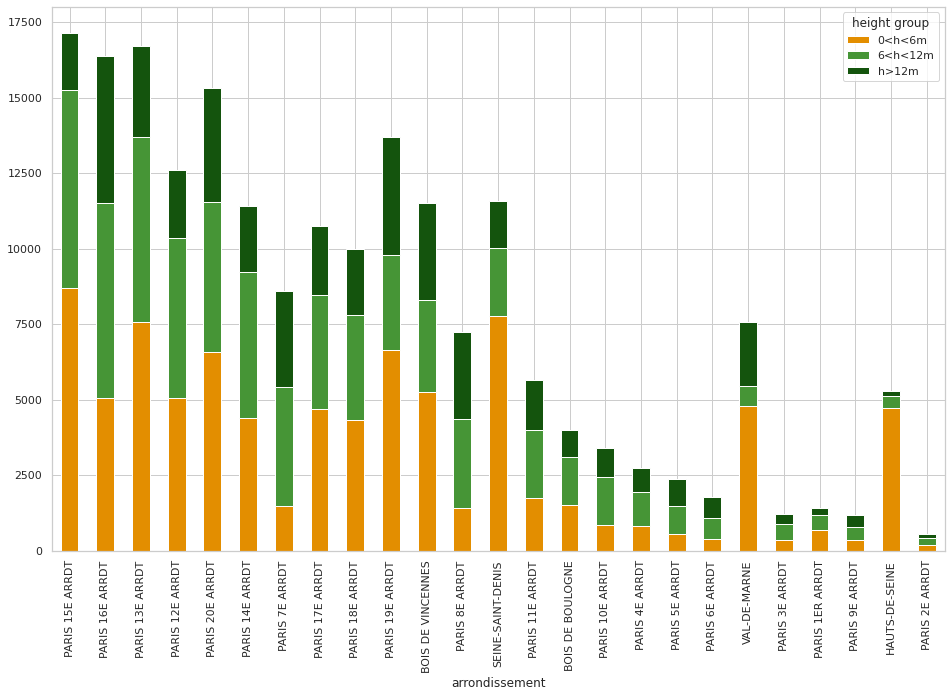

In [ ]:
sns. set_style("whitegrid")
dfhauteursJeunes_categ.plot(kind="bar", stacked=True,figsize=(16,10),color=["#e38e00","#469536","#14540d","#0f1a07"])